In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib


In [2]:
fto = '/storage/stations/LS/vezicka/'


/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_23
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_11
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_08
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_02
/storage/stations/LS/vezi

(19563.416666666668, 19563.541666666668)

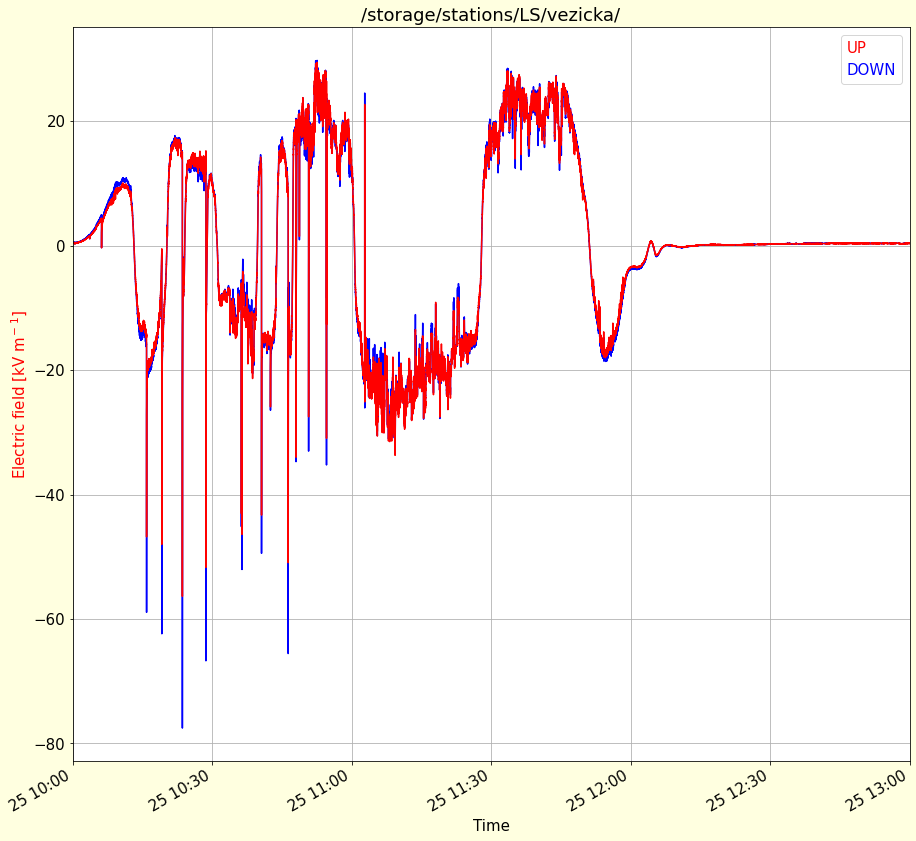

In [38]:
ftt = glob.iglob(fto+"/**/efm*.csv.2023-08-30*") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/**/efm*.csv.2023-07-25*") # generator, search immediate subdirectories 

plt.figure(figsize=(15,15), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 5
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 5.3
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid(which='both')
plt.xlabel('Time')
#plt.yscale('symlog')

#plt.ylim(-50,50)
#plt.ylim(-2,2)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')
#plt.xlim('2023-08-30 15:00','2023-08-30 21:30')
plt.xlim('2023-07-25 10:00','2023-07-25 13:00')


/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_01
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_12
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_18
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_20
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_15
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_06
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_02
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_11
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_23
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_16
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_05
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_13
/storage/stations/LS/vezi

(19522.375, 19522.416666666668)

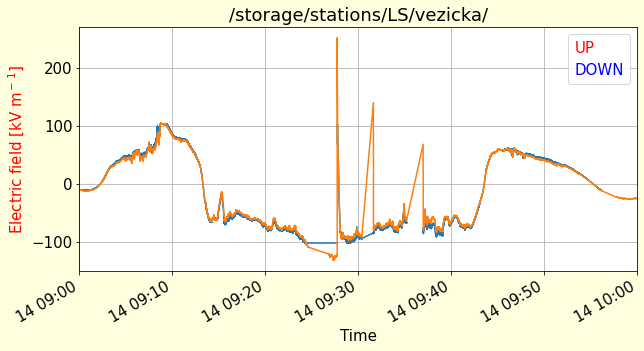

In [97]:
ftt = glob.iglob(fto+"/**/efm*.csv.2023-08-30*") # event do prezentace TEPA
ftt = glob.iglob(fto+"/**/efm*.csv.2023-06-14*") # mega event

plt.figure(figsize=(10,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

up = pd.DataFrame()
down = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 5
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 20 #5
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce') * factor
    
    if 'up' in f:
        up = pd.concat([up,df])
    else:
        down = pd.concat([down,df])

(up['field']).plot(label='UP')
(down['field']).plot(label='down')
plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid(which='both')
plt.xlabel('Time')
#plt.yscale('symlog')

#plt.ylim(-50,50)
#plt.ylim(-2,2)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')
#plt.xlim('2023-08-30 15:00','2023-08-30 21:30') # event do prezentace TEPA
plt.xlim('2023-06-14 09:00','2023-06-14 10:00') # mega event


In [98]:
up = up.sort_index()
up = up.resample('1s').mean()
down = down.sort_index()
down = down.resample('1s').mean()


(19522.375, 19522.416666666668)

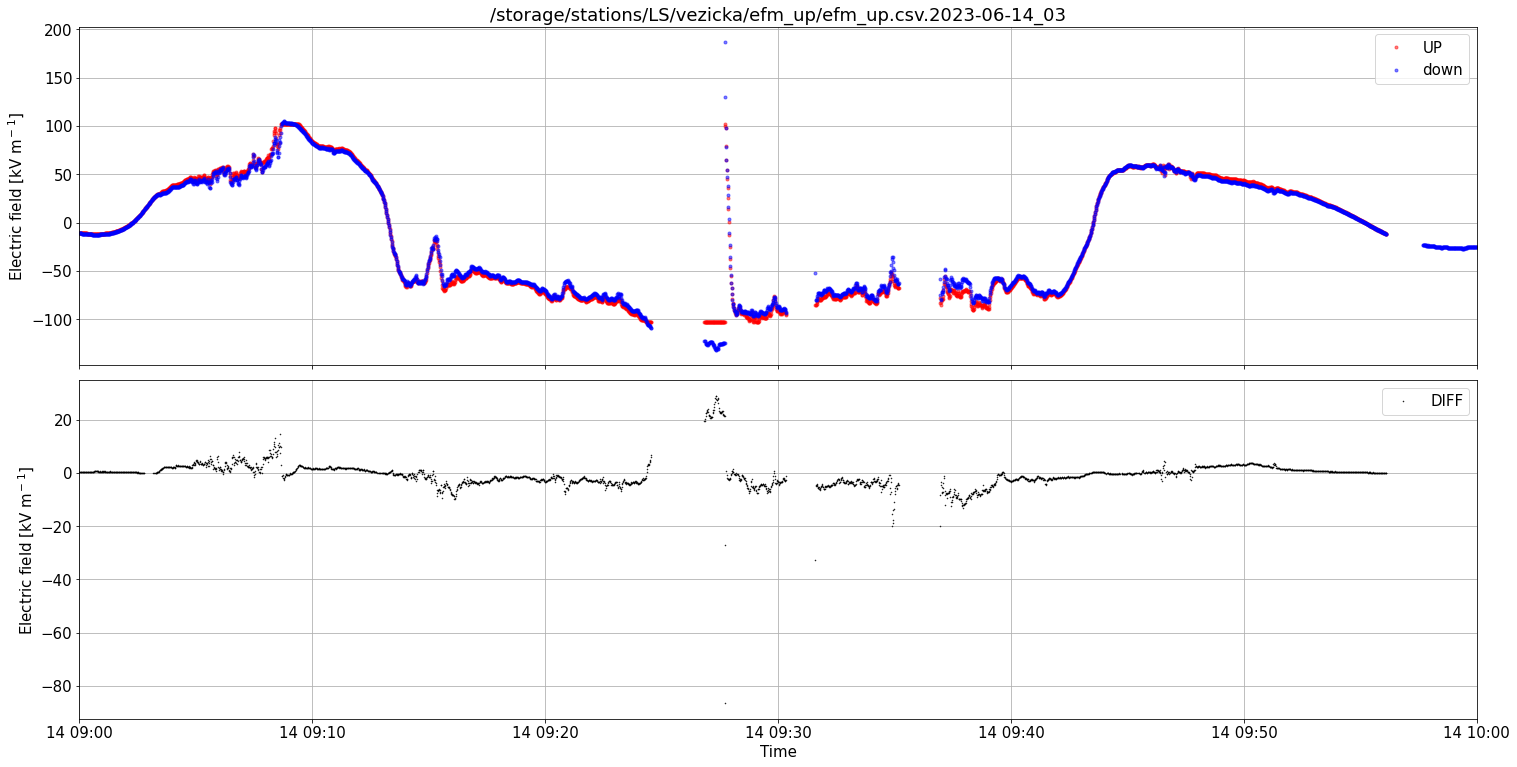

In [101]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
matplotlib.rcParams.update({'font.size': 15})
fig.tight_layout(pad=0.0)

ax1.plot((up['field']), marker='.', ls='', label='UP', color='red', alpha=0.5)
ax1.plot((down['field']), marker='.', ls='', label='down', color='blue', alpha=0.5)
ax1.set_ylabel('Electric field [kV m$^-$$^1$]')
ax1.set_title(f)
ax1.legend(fancybox=True) 
ax1.grid(which='both')
#ax1.set_yscale('symlog')

#plt.ylim(-50,50)
#ax1.set_xlim(pd.to_datetime('2023-08-30 15:00'),pd.to_datetime('2023-08-30 22:00'))
ax1.set_xlim(pd.to_datetime('2023-06-14 09:00'),pd.to_datetime('2023-06-14 10:00'))

up['diff'] = (up['field'])-(down['field'])

ax2.plot(up['diff'].loc[abs(up['diff'])>0.06], '.',ms=1, label='DIFF', color='black')
ax2.set_ylabel('Electric field [kV m$^-$$^1$]')
ax2.legend(fancybox=True) 
ax2.grid(which='both')
ax2.set_xlabel('Time')
#ax2.set_yscale('symlog')

#plt.ylim(-50,50)
#ax2.set_xlim(pd.to_datetime('2023-08-30 15:00'),pd.to_datetime('2023-08-30 22:00'))
ax2.set_xlim(pd.to_datetime('2023-06-14 09:00'),pd.to_datetime('2023-06-14 10:00'))


In [67]:
down

In [3]:
fto = '/storage/stations/LS/vezicka/'


/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_07
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_19
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_21
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_00
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_09
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_22
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_01
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_02
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_23
/storage/stations/LS/vezicka/thundermill1/thundermi

(-5.0, 5.0)

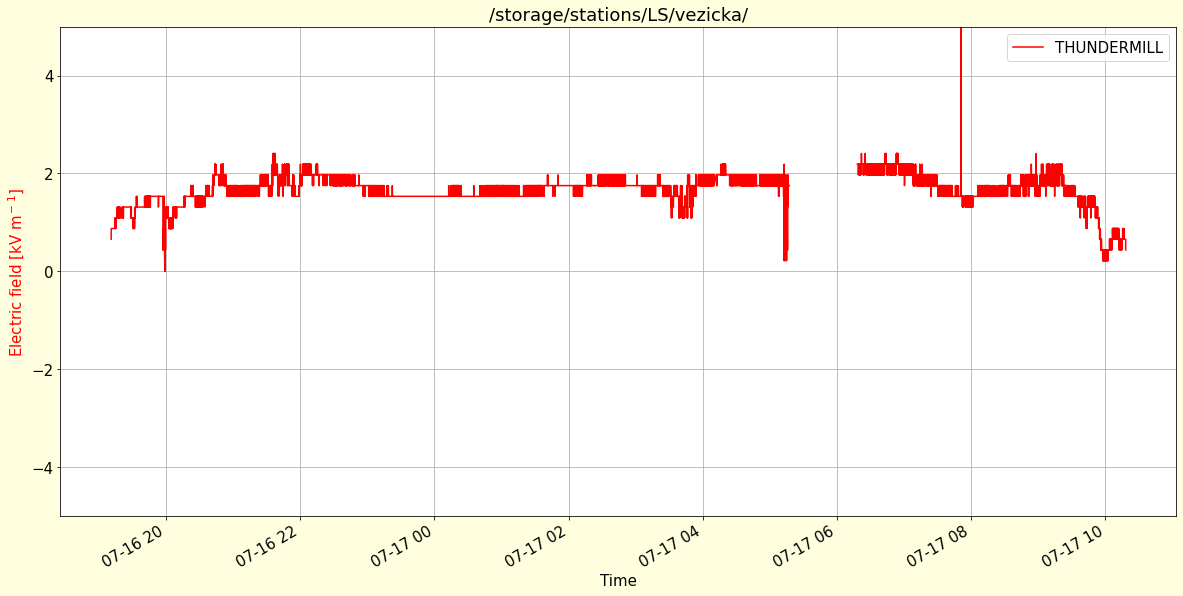

In [11]:
ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-07-*") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'red'
    factor = 0.219 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    ((df['field']-128)*factor).plot(label=label, color=color)
    #(df['field1']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
plt.ylim(-5,5)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')

In [ ]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-09-26*'
#datum = '2023-07-19*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[90]-256)*factor).plot(label=label, color=color)
    #((df['field']-256)*factor).plot(label=label, color='darkgreen')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
#plt.xlim('2023-07-25 09:00','2023-07-25 13:00') # zatim jedina bourka cela zaznamenana THUNDERMILL, 25. 7. 2023
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
#plt.xlim('2023-08-29 00:00','2023-08-29 23:00')

plt.legend(['Boltek UP','Boltek DOWN', 'THUNDERMILL'], loc=3,labelcolor=['red','blue', 'green'], handlelength=0, handletextpad=0, fancybox=True) 



/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_00
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_13
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_19
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_21
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_14
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_07
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_03
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_09
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_10
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_22
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_17
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_06
/storage/stations/LS/vezicka/thundermill1/thundermi

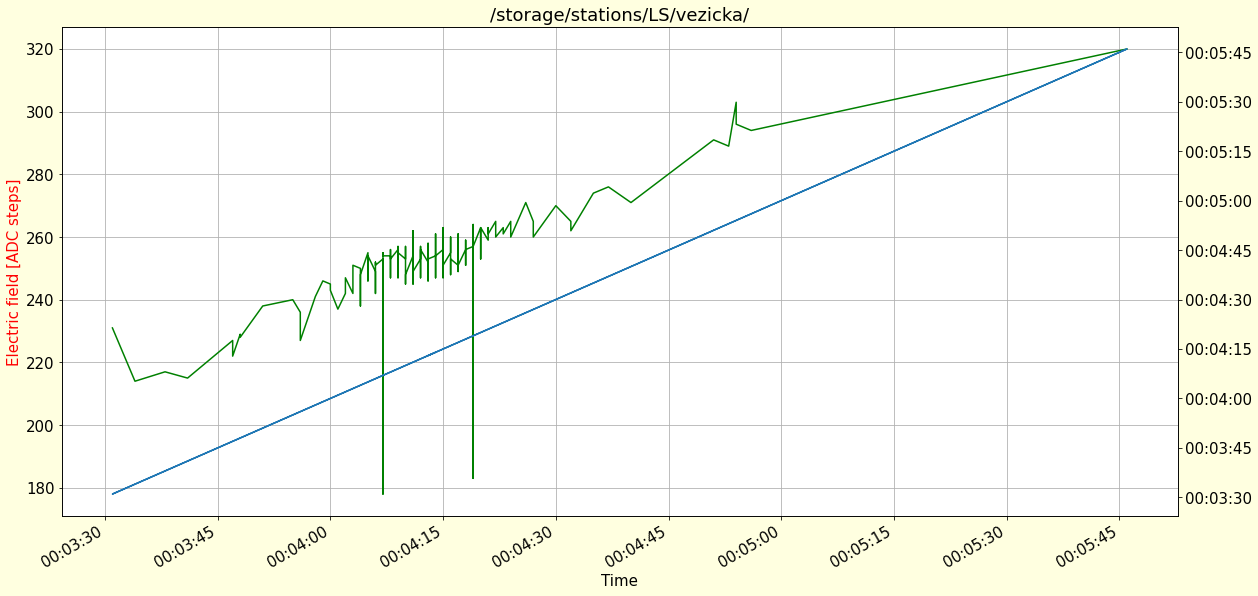

In [17]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-08-29_*") # generator, search immediate subdirectories 

label = 'THUNDERMILL'
color = 'green'
factor = 0.219 # kV/m 

df = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    
    rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf['field'])
    
    df = pd.concat([df, rdf])

((df[125])).plot(label=label, color=color)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(230,300)
#plt.xlim('2023-07-19 14:02:00','2023-07-19 14:03:30')

plt.twinx()

plt.plot(df['time'])
#plt.ylim(pd.to_datetime('2023-07-19 14:02:00'),pd.to_datetime('2023-07-19 14:03:00'))

    

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,field,field1,time
time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:04:13,253,254,253,253,253,253,254,253,253,253,...,253,253,253,254,253,254,253,254,253,1970-01-01 00:04:13
1970-01-01 00:04:16,256,249,248,253,256,251,253,248,254,255,...,249,254,256,252,252,254,251,257,248,1970-01-01 00:04:16
1970-01-01 00:04:14,254,254,254,254,254,254,254,254,254,254,...,254,253,253,254,253,254,254,254,253,1970-01-01 00:04:14
1970-01-01 00:04:12,252,249,256,254,249,254,256,252,253,254,...,255,255,255,255,255,255,255,257,249,1970-01-01 00:04:12
1970-01-01 00:04:14,254,254,255,254,255,254,254,254,254,254,...,254,254,254,254,254,254,254,255,253,1970-01-01 00:04:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:04:13,253,253,254,254,254,254,253,253,253,253,...,254,253,254,254,253,254,253,254,252,1970-01-01 00:04:13
1970-01-01 00:04:13,253,255,251,252,255,252,254,252,253,254,...,254,254,254,254,254,254,254,256,250,1970-01-01 00:04:13
1970-01-01 00:04:13,253,253,253,254,253,253,253,253,253,253,...,254,254,254,254,254,253,254,254,252,1970-01-01 00:04:13


/tmp/ipykernel_29683/3665114023.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc[TIME:TIMEEND,1:199].T.plot(legend=None)


Text(0.5, 1.0, '2023-07-25 10:15:00')

<Figure size 1440x720 with 0 Axes>

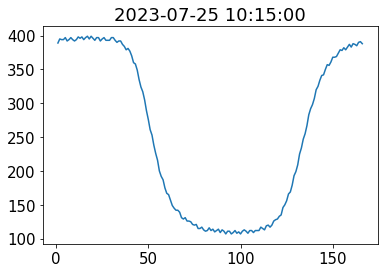

In [178]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

TIME = '2023-07-25 10:15:00'
TIMEEND = TIME + '.999'
df.loc[TIME:TIMEEND,1:199].T.plot(legend=None)
#df.loc['2023-07-19 14:05:00':'2023-07-19 14:05:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:10:00':'2023-07-19 14:10:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:15:00':'2023-07-19 14:15:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:02:00':'2023-07-19 14:02:19',1:150].T.plot(legend=None, color='blue')
#df.loc['2023-07-19 14:02:20':'2023-07-19 14:02:29',1:150].T.plot(legend=None, color='red')
plt.title(TIME)

/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_11
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_23
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_16
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_05
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_18
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_12
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_15
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_17
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_10
/storage/stations/LS/vezicka/thundermill1/thundermi

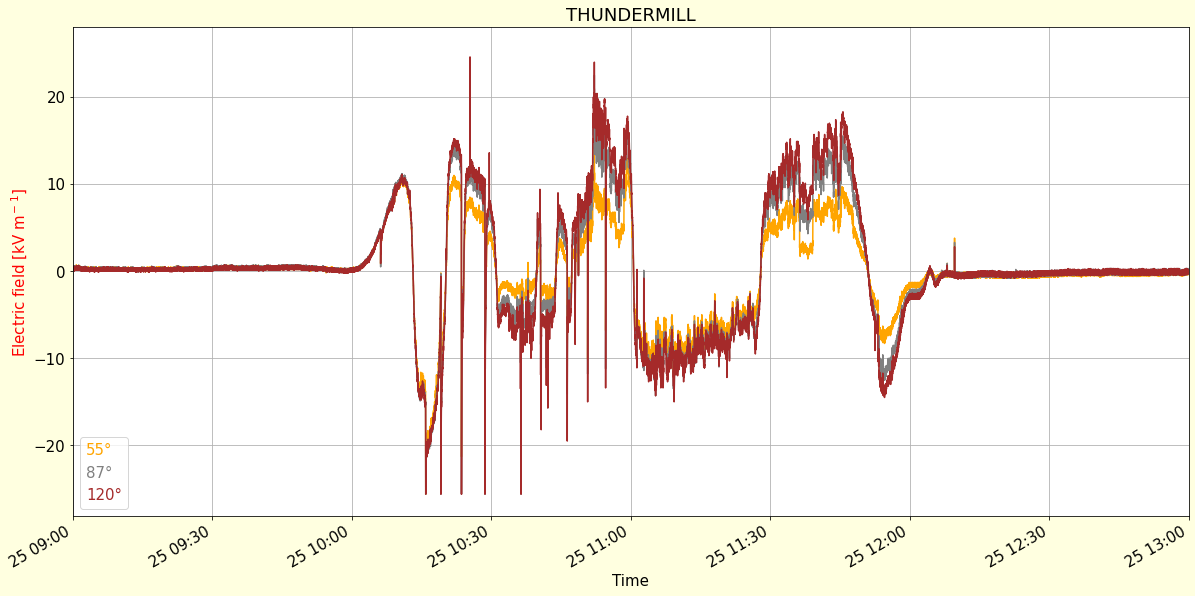

In [8]:
ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.1 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[75]-256)*factor).plot(label=label, color='orange')
    ((df[90]-256)*factor).plot(label=label, color='gray')
    ((df[105]-256)*factor).plot(label=label, color='brown')
    #((df['field']-256)*factor).plot(label=label, color='lightblue')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title('THUNDERMILL')
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 09:00','2023-07-25 13:00')

plt.legend([str(round((360/165)*(75-50)))+'°',str(round((360/165)*(90-50)))+'°',str(round((360/165)*(105-50)))+'°'], loc=3,labelcolor=['orange','gray', 'brown'], handlelength=0, handletextpad=0, fancybox=True) 


In [115]:
ftt = glob.iglob(fto+"/**/mrakomer.csv."+datum) # generator, search immediate subdirectories 

mrakomer = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,10))
    
    df = pd.read_csv(f, sep='[ ,]', header=None, names=l, comment='*', on_bad_lines='skip', engine='python')

    label = 'Mrakomer'
    color = 'green'
    
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    
    mrakomer = pd.concat([mrakomer,df])


/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_06
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_15
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_18
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_12
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_20
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_01
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_05
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_16
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_11
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_23
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_08
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_02
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_00
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_13
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_19
/storage/stations/LS/vezi

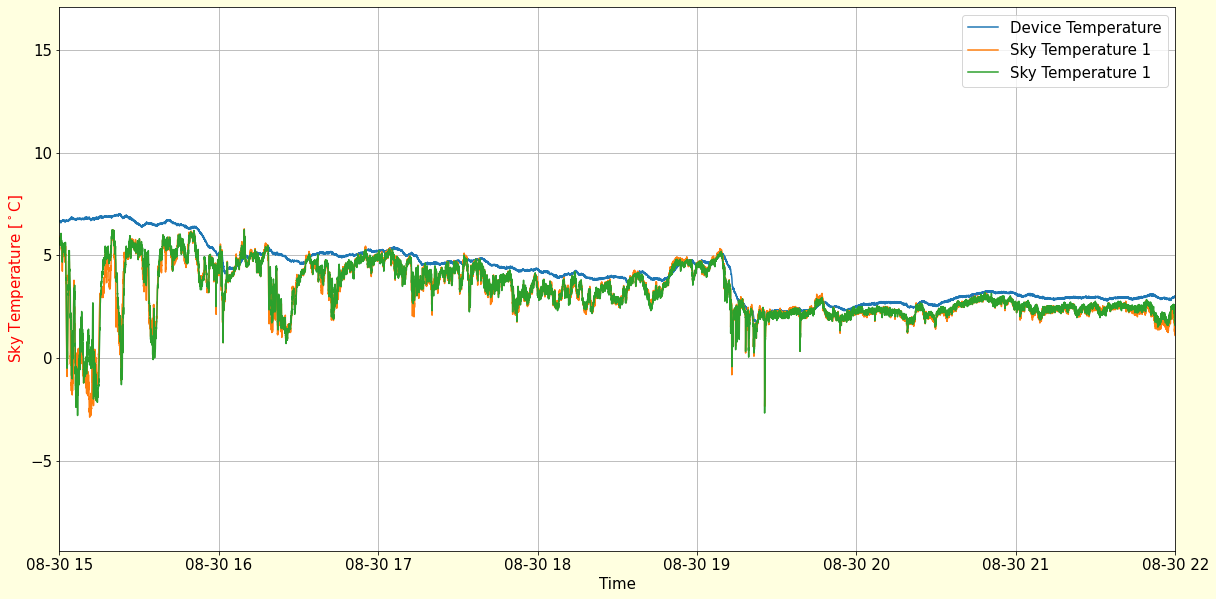

In [118]:
mrakomer = mrakomer.sort_index()

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(mrakomer[3]/100, label='Device Temperature')
plt.plot(mrakomer[4]/100, label='Sky Temperature 1')
plt.plot(mrakomer[5]/100, label='Sky Temperature 1')

plt.ylabel('Sky Temperature [$^\circ$C]', color='red')
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
#plt.xlim(pd.to_datetime('2023-07-25 09:00'),pd.to_datetime('2023-07-25 13:00'))
plt.xlim(pd.to_datetime('2023-08-30 15:00'),pd.to_datetime('2023-08-30 22:00'))

plt.legend()


# SEVAN

In [98]:
f = '/storage/stations/LS/SEVAN/2023_07_25.txt'
f = '/storage/stations/LS/SEVAN/2023_08_30.txt'

l=[]
l.extend(range(0,2))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python')
    


<AxesSubplot:>

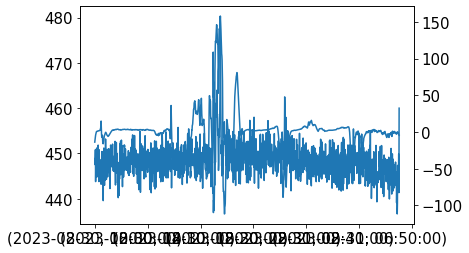

In [99]:
df[0].plot()
plt.twinx()
df[1].plot()

/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_11
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_23
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_16
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_05
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_18
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_12
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_15
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_17
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_10
/storage/stations/LS/vezicka/thundermill1/thundermi

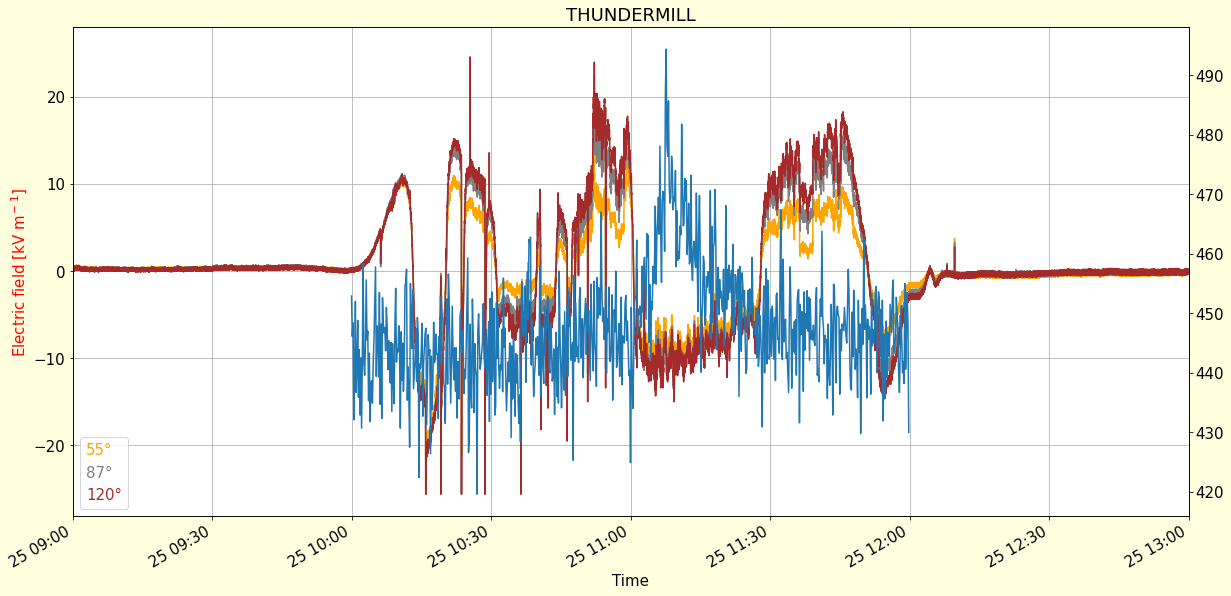

In [83]:
ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.1 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[75]-256)*factor).plot(label=label, color='orange')
    ((df[90]-256)*factor).plot(label=label, color='gray')
    ((df[105]-256)*factor).plot(label=label, color='brown')
    #((df['field']-256)*factor).plot(label=label, color='lightblue')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')



plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title('THUNDERMILL')
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 09:00','2023-07-25 13:00')

plt.legend([str(round((360/165)*(75-50)))+'°',str(round((360/165)*(90-50)))+'°',str(round((360/165)*(105-50)))+'°'], loc=3,labelcolor=['orange','gray', 'brown'], handlelength=0, handletextpad=0, fancybox=True) 


plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_07_25.txt'

l=[]
l.extend(range(0,4))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
df['time']=pd.to_datetime(df[0]+' '+df[1])
df = df.set_index(df['time'])
plt.plot(df[2])



/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_23
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_11
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_08
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_02
/storage/stations/LS/vezi

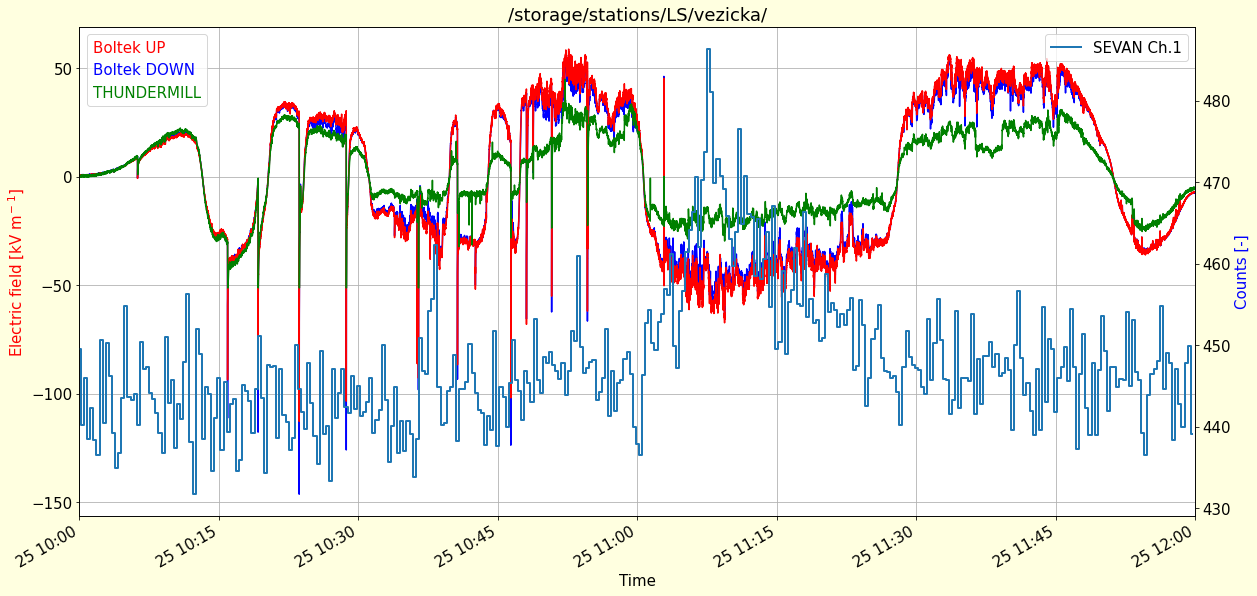

In [107]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-07-25*'
#datum = '2023-07-19*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[90]-256)*factor).plot(label=label, color=color)
    #((df['field']-256)*factor).plot(label=label, color='darkgreen')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 10:00','2023-07-25 12:00')
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
#plt.xlim('2023-08-29 00:00','2023-08-29 23:00')

plt.legend(['Boltek UP','Boltek DOWN', 'THUNDERMILL'], loc=2,labelcolor=['red','blue', 'green'], handlelength=0, handletextpad=0, fancybox=True) 

plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_07_25.txt'

l=[]
l.extend(range(0,4))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
df['time']=pd.to_datetime(df[0]+' '+df[1])
df = df.set_index(df['time'])
plt.plot(df[2].resample('20s').mean(), label='SEVAN Ch.1', linewidth=2,  drawstyle='steps-mid')
plt.ylabel('Counts [-]', color='blue')

plt.legend()

/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_03
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_01
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_12
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_18
/storage/stations/LS/vezi

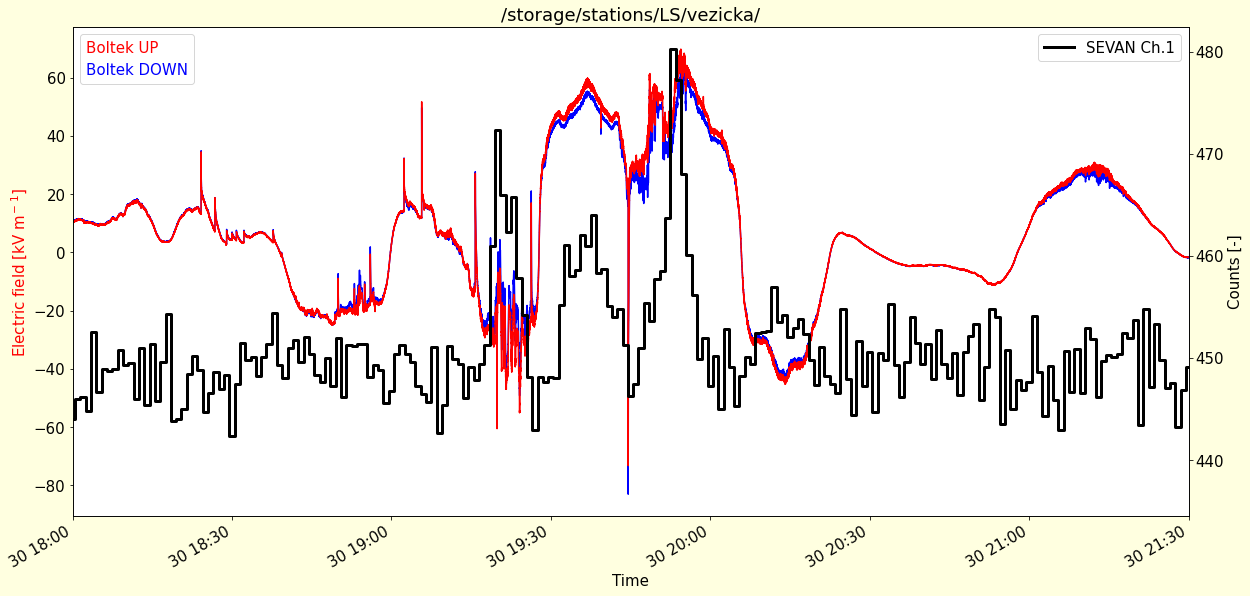

In [122]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-07-25*'
#datum = '2023-07-19*'
datum = '2023-08-30*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

'''
ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[90]-256)*factor).plot(label=label, color=color)
    #((df['field']-256)*factor).plot(label=label, color='darkgreen')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
'''
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
##plt.xlim('2023-07-25 10:00','2023-07-25 12:00')
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
plt.xlim('2023-08-30 15:00','2023-08-30 22:00')
plt.xlim('2023-08-30 18:00','2023-08-30 21:30')

plt.legend(['Boltek UP','Boltek DOWN'], loc=2,labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 

plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_08_30.txt'

l=[]
l.extend(range(0,4))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
df['time']=pd.to_datetime(df[0]+' '+df[1])
df = df.set_index(df['time'])
#plt.plot(df[2].resample('20s').mean(), label='SEVAN Ch.1', ls='-', linewidth=2,  drawstyle='steps-mid')
plt.plot(df[2], label='SEVAN Ch.1', ls='-', linewidth=3,  drawstyle='steps-mid', color='black')
#plt.plot(df[2], label='SEVAN Ch.1')
plt.ylabel('Counts [-]', color='black')

plt.legend()

# BOLTEK DOWN, THUNDERMILL DOWN, THUNDERMILL_UP

/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2023-09-27_02
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2023-09-27_01
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2023-09-27_03
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2023-09-27_00
/storage/stations/LS/vezicka/thundermill_down/thundermill_down.csv.2023-09-27_02
/storage/stations/LS/vezicka/thundermill_down/thundermill_down.csv.2023-09-27_01
/storage/stations/LS/vezicka/thundermill_down/thundermill_down.csv.2023-09-27_03
/storage/stations/LS/vezicka/thundermill_down/thundermill_down.csv.2023-09-27_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-09-27_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-09-27_03
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-09-27_01
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-09-27_02


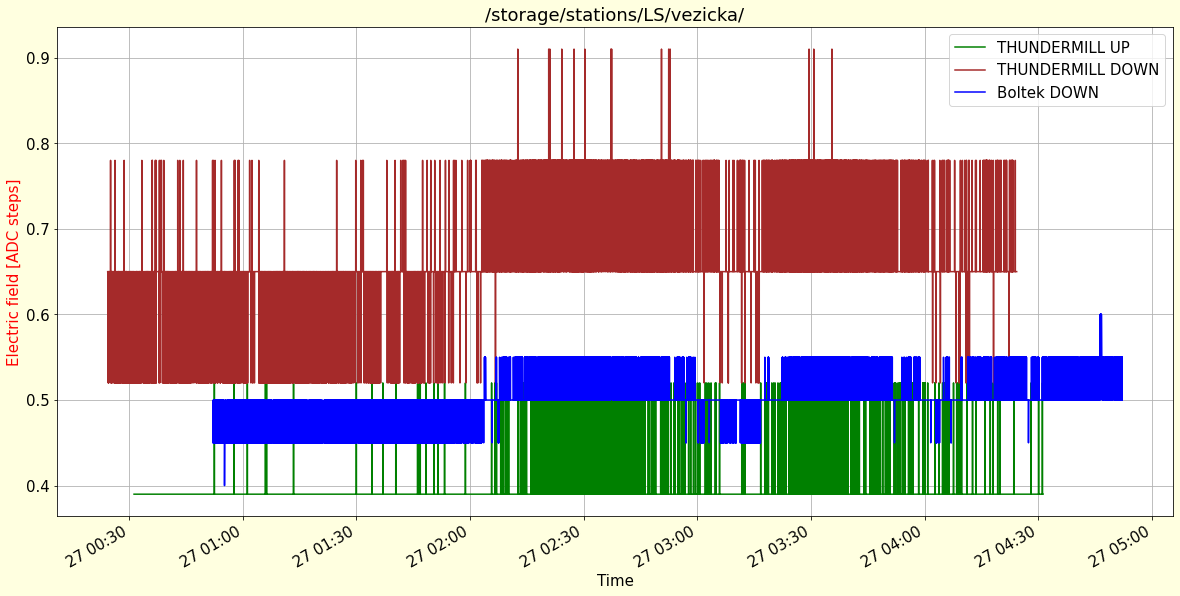

In [16]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

fto = '/storage/stations/LS/vezicka/'
selection = '2023-09-27_*'

ftt = glob.iglob(fto+"/**/thundermill_up.csv."+selection) # generator, search immediate subdirectories 

label = 'THUNDERMILL UP'
color = 'green'
factor = 0.13 # kV/m . DIV 

dftu = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    
    rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf['field'])
    rdf['field'] = ((rdf['field'])-254) * factor
    
    dftu = pd.concat([dftu, rdf])

dftu.sort_index(inplace=True)
(dftu['field']).plot(label=label, color=color)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.xlim('2023-07-19 14:02:00','2023-07-19 14:03:30')


ftt = glob.iglob(fto+"/**/thundermill_down.csv."+selection) # generator, search immediate subdirectories 

label = 'THUNDERMILL DOWN'
color = 'brown'
factor = 0.13 # kV/m . DIV 

dftd = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    
    rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf['field'])
    rdf['field'] = ((rdf['field'])-262) * factor
    
    dftd = pd.concat([dftd, rdf])

dftd.sort_index(inplace=True)
(dftd['field']).plot(label=label, color=color)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.xlim('2023-07-19 14:02:00','2023-07-19 14:03:30')

ftt = glob.iglob(fto+"/**/efm_down.csv."+selection) # generator, search immediate subdirectories 

label = 'Boltek DOWN'
color = 'blue'
factor = 5

dfbd = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    df['field'] = df['field']*factor
    
    dfbd = pd.concat([dfbd, df])

dfbd.sort_index(inplace=True)
(dfbd['field']).plot(label=label, color=color)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')

#plt.xlim('2023-09-26 16:30','2023-09-26 22:00')
#plt.ylim(-5,5)
plt.legend()


In [19]:
dftd

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,field,field1,time
time,,,,,,,,,,,,,,,,,,,,,
2023-09-26 00:03:44.440000000,1.695687e+09,264,263,268,267,264,262,266,263,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090909,244.0,2023-09-26 00:03:44.440000000
2023-09-26 00:03:45.200000000,1.695687e+09,264,266,263,266,267,263,264,266,264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.227273,244.0,2023-09-26 00:03:45.200000000
2023-09-26 00:03:45.950000128,1.695687e+09,265,267,263,265,264,266,264,264,262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.681818,243.0,2023-09-26 00:03:45.950000128
2023-09-26 00:03:46.700000000,1.695687e+09,266,264,267,263,264,267,264,262,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090909,244.0,2023-09-26 00:03:46.700000000
2023-09-26 00:03:47.450000128,1.695687e+09,265,267,263,264,267,264,266,264,261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090909,244.0,2023-09-26 00:03:47.450000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26 01:03:40.829999872,1.695690e+09,262,266,264,262,266,263,265,262,260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.954545,245.0,2023-09-26 01:03:40.829999872
2023-09-26 01:03:41.580000000,1.695690e+09,263,265,265,262,264,265,261,263,262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.545455,245.0,2023-09-26 01:03:41.580000000
2023-09-26 01:03:42.329999872,1.695690e+09,264,262,265,265,263,265,262,261,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.545455,246.0,2023-09-26 01:03:42.329999872
